In [1]:
# Basic libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Machine learning preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_validate


from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import IterativeImputer  # For MICE implementation

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import RFECV


# Metrics for evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, precision_recall_curve, auc,ConfusionMatrixDisplay)

# Model interpretation
import shap

# Utilities
import os
import time
import joblib
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the dataset
file_path = r"/Users/jayendra/Documents/alzheimers_prediction_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Print the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Print dataset info
print("\nDataset information:")
print(df.info())



First 5 rows of the dataset:
        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy

In [3]:
# Step 2: Identify missing values and duplicates

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Remove duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df.shape}")


Missing values per column:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban 

In [4]:
# Generate statistical summary for numerical columns
print("\nStatistical Summary for Numerical Columns:")
print(df.describe())


Statistical Summary for Numerical Columns:
                Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000


In [5]:
# First, let's check the exact column names in your dataset
print("Column names in the dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Fix for the histplot - using column index approach
plt.figure(figsize=(10, 6))
target_column = df.columns[-1]  # Assuming target is the last column
print(f"Using target column: {target_column}")

Column names in the dataset:
0: Country
1: Age
2: Gender
3: Education Level
4: BMI
5: Physical Activity Level
6: Smoking Status
7: Alcohol Consumption
8: Diabetes
9: Hypertension
10: Cholesterol Level
11: Family History of Alzheimer’s
12: Cognitive Test Score
13: Depression Level
14: Sleep Quality
15: Dietary Habits
16: Air Pollution Exposure
17: Employment Status
18: Marital Status
19: Genetic Risk Factor (APOE-ε4 allele)
20: Social Engagement Level
21: Income Level
22: Stress Levels
23: Urban vs Rural Living
24: Alzheimer’s Diagnosis
Using target column: Alzheimer’s Diagnosis


<Figure size 1000x600 with 0 Axes>

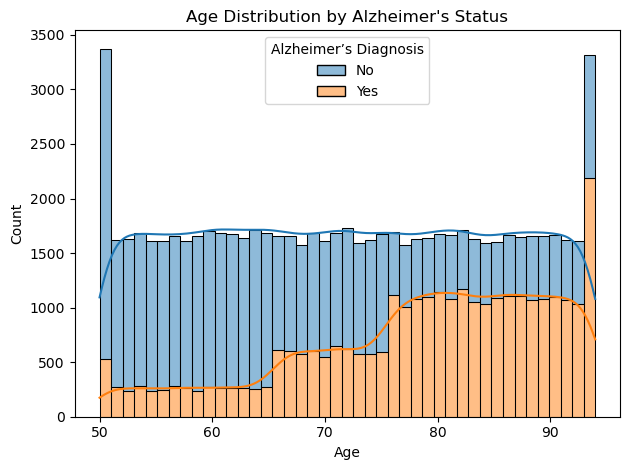

In [6]:
# Create age distribution by target variable
sns.histplot(data=df, x='Age', hue=target_column, kde=True, multiple='stack')
plt.title('Age Distribution by Alzheimer\'s Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_by_alzheimers.png')
plt.show()

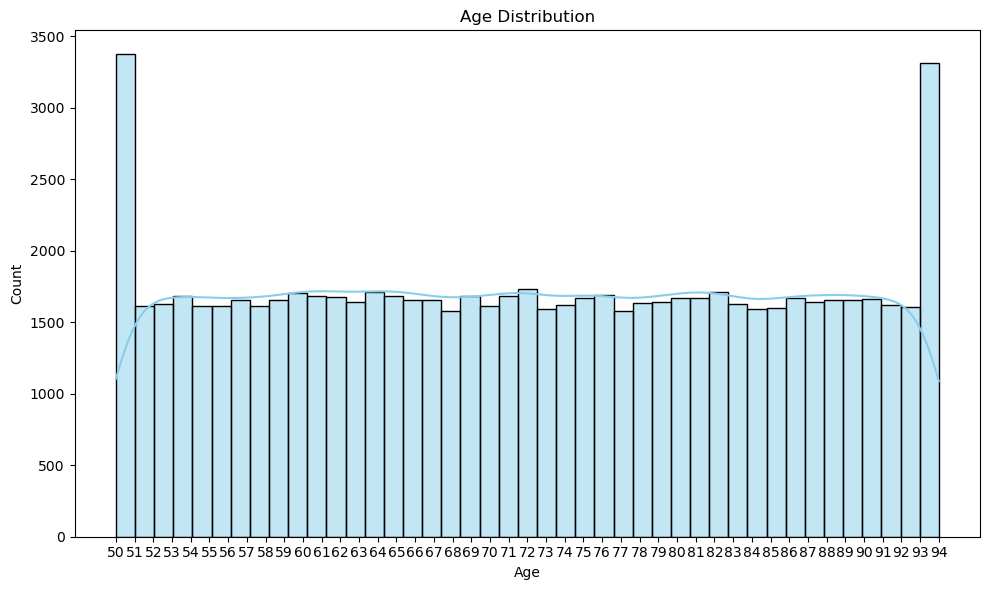

In [7]:


# 1. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Set 1-unit ticks on the x-axis
min_age = int(df['Age'].min())
max_age = int(df['Age'].max())
plt.xticks(ticks=range(min_age, max_age + 1, 1))

plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300)
plt.show()


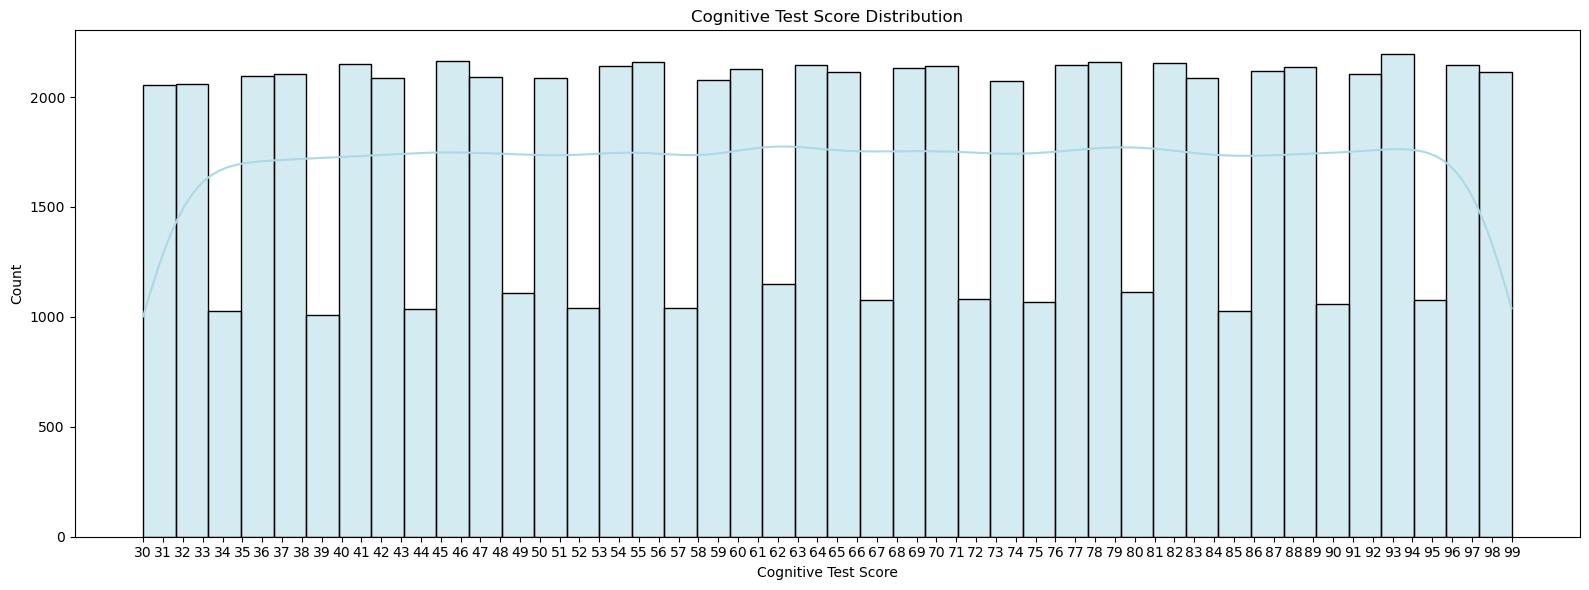

In [8]:
# 2. Cognitive Test Score Distribution
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Cognitive Test Score', kde=True, color='lightblue')

plt.title('Cognitive Test Score Distribution')
plt.xlabel('Cognitive Test Score')
plt.ylabel('Count')

# Set 1-unit ticks on the x-axis
min_score = int(df['Cognitive Test Score'].min())
max_score = int(df['Cognitive Test Score'].max())
plt.xticks(ticks=range(min_score, max_score + 1, 1))

plt.tight_layout()
plt.savefig('cognitive_score_distribution.png', dpi=300)
plt.show()


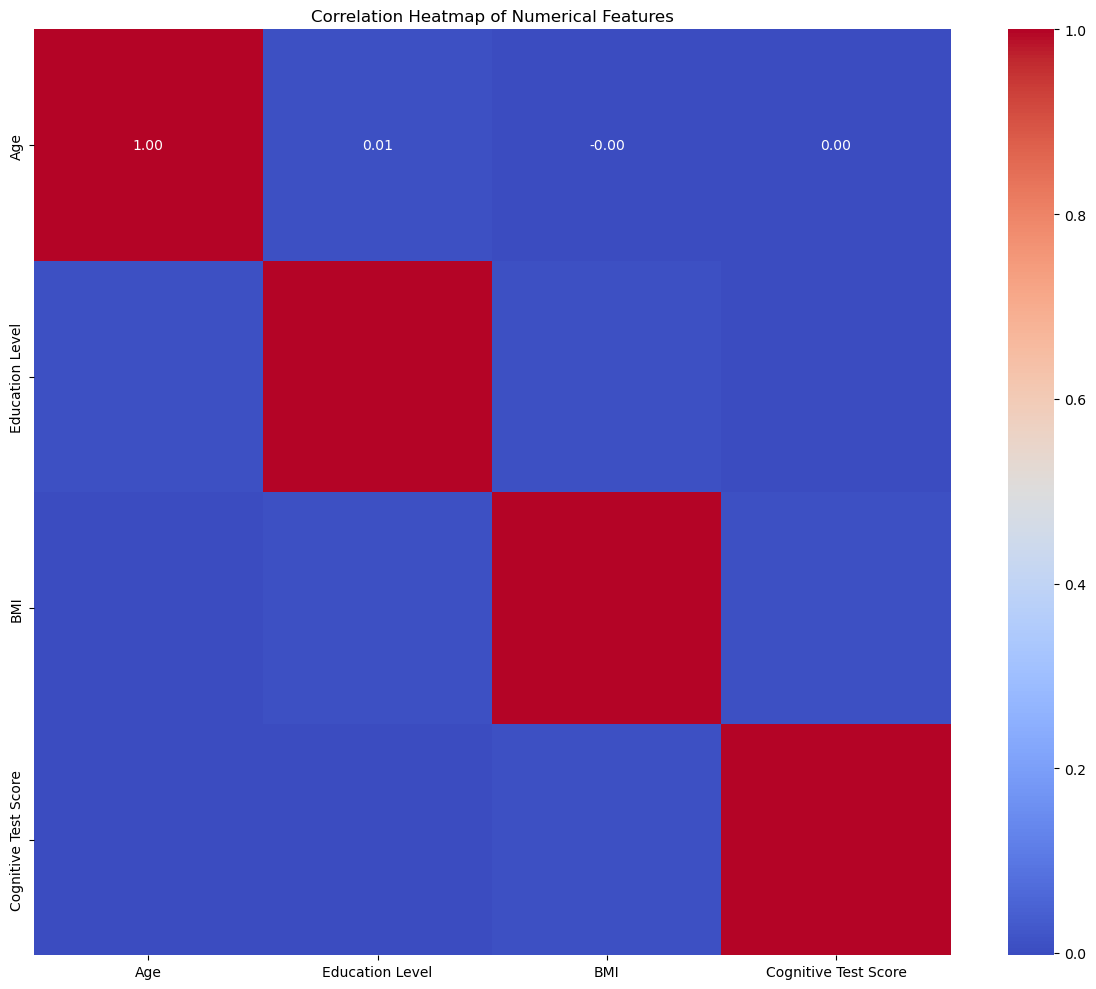

In [9]:
# 3. Correlation heatmap - using numeric columns only
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

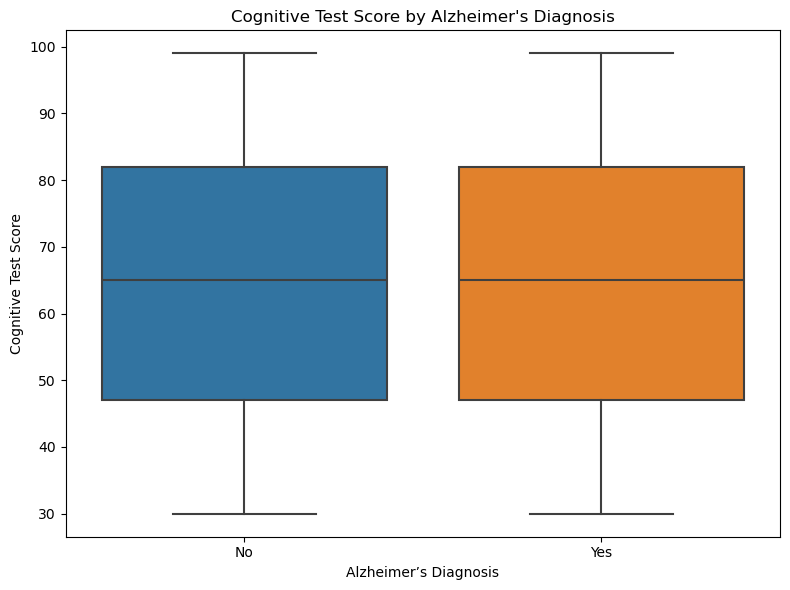

In [10]:
# 4. Box plot of Cognitive Score by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Cognitive Test Score')
plt.title('Cognitive Test Score by Alzheimer\'s Diagnosis')
plt.tight_layout()
plt.savefig('cognitive_boxplot.png')
plt.show()

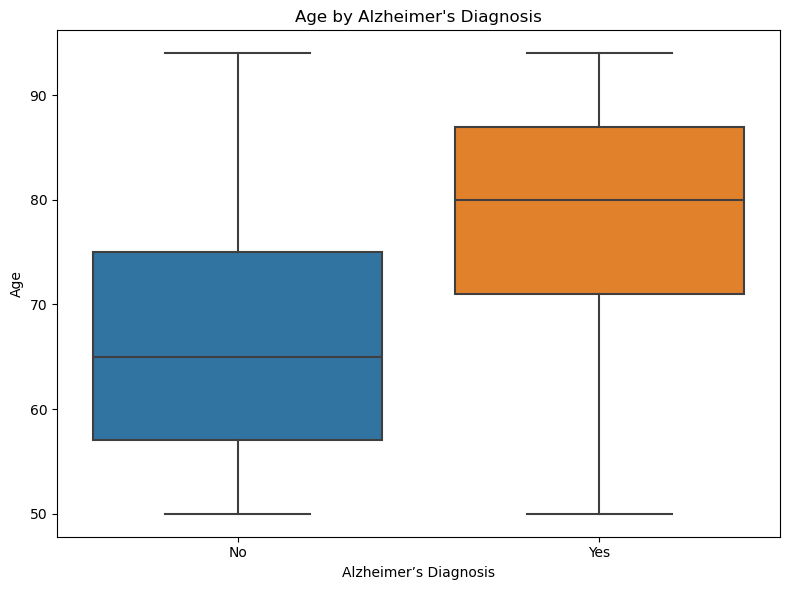

In [11]:
# 5. Boxplot of Age by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Age')
plt.title('Age by Alzheimer\'s Diagnosis')
plt.tight_layout()
plt.savefig('age_boxplot.png')
plt.show()


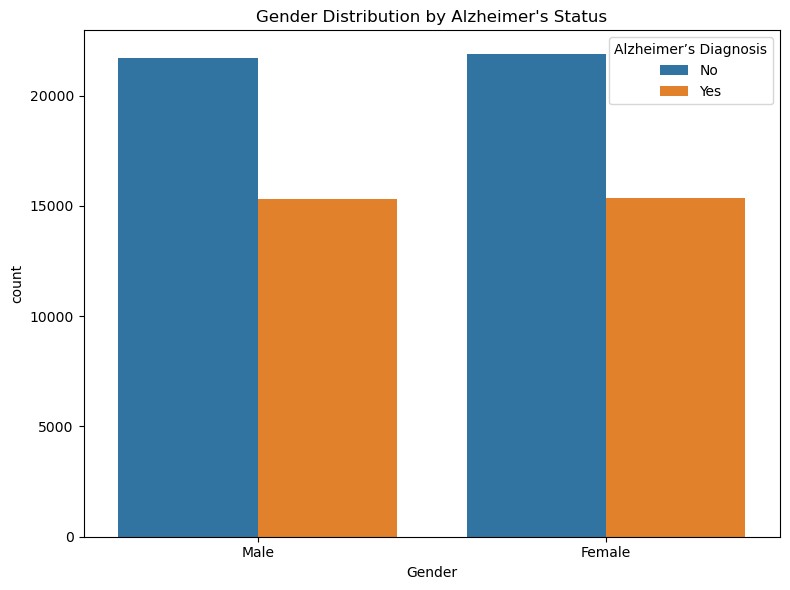

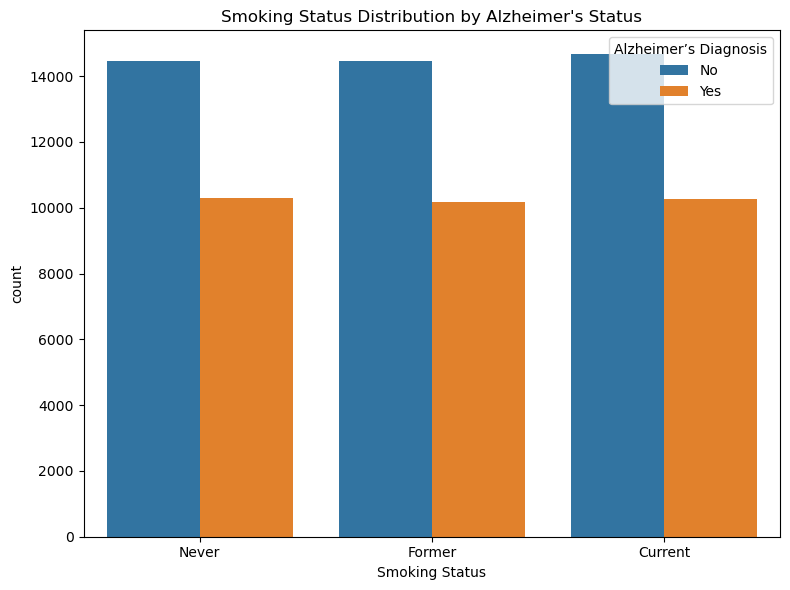

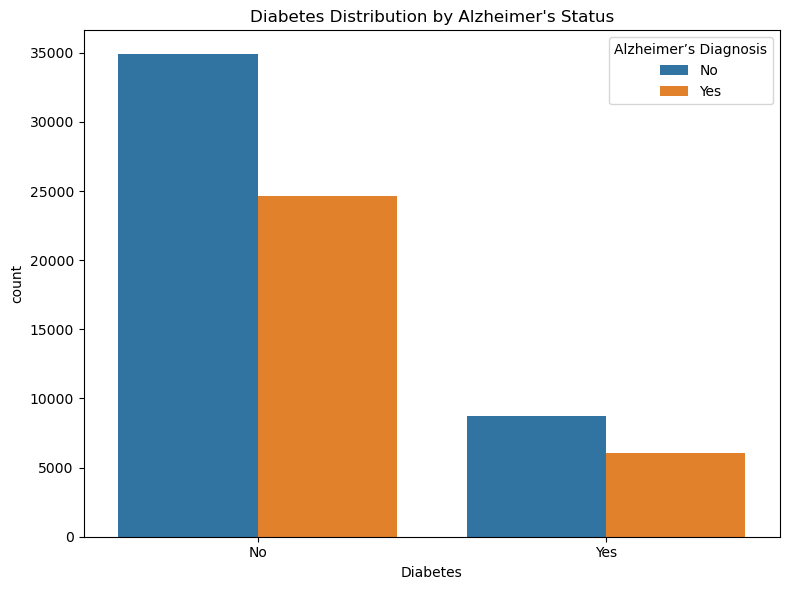

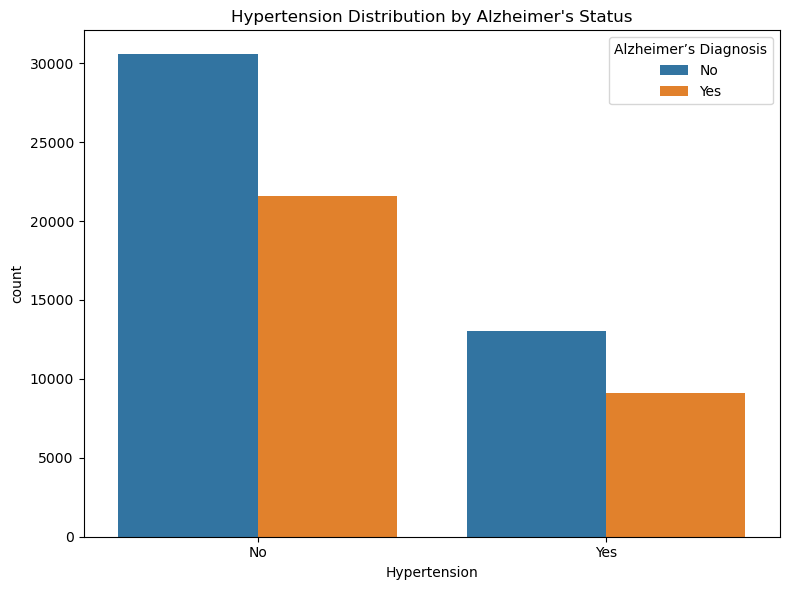

In [12]:
# Count plots for key categorical variables
categorical_vars = ['Gender', 'Smoking Status', 'Diabetes', 'Hypertension']
for var in categorical_vars:
    if var in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=var, hue=target_column)
        plt.title(f'{var} Distribution by Alzheimer\'s Status')
        plt.tight_layout()
        plt.savefig(f'{var.lower().replace(" ", "_")}_distribution.png')
        plt.show()

In [13]:
# Step 5: Feature Engineering and Target Definition
print("\n" + "="*50)
print("FEATURE ENGINEERING AND TARGET DEFINITION")
print("="*50)

# Separate features and target
target_column = df.columns[-1]  # Assuming target is the last column
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Target column: {target_column}")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


FEATURE ENGINEERING AND TARGET DEFINITION
Target column: Alzheimer’s Diagnosis
Features shape: (74283, 24)
Target distribution:
Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 3: Define transformers
num_transformer = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Step 4: ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Step 5: Fit-transform on train, transform on test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Step 6: Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Preprocessing complete.\nTrain shape: {X_train_preprocessed.shape}\nTest shape: {X_test_preprocessed.shape}")


Preprocessing complete.
Train shape: (59426, 74)
Test shape: (14857, 74)



                            LOGISTIC REGRESSION MODEL

Train Confusion Matrix:
[[24724 10132]
 [ 6853 17717]]

Test Confusion Matrix:
[[6200 2514]
 [1690 4453]]


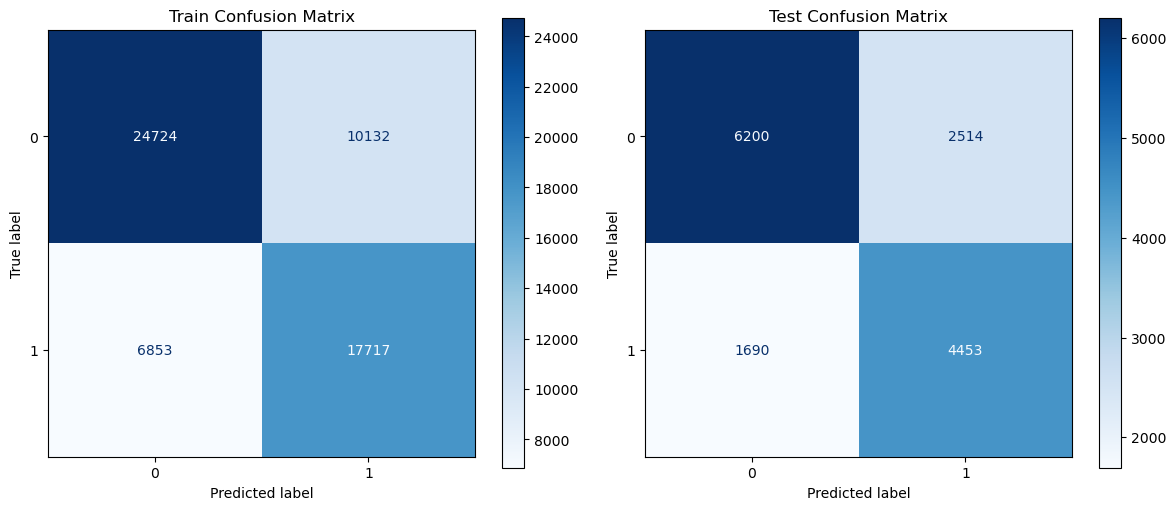


Classification Report (Train):
              precision    recall  f1-score   support

          No     0.7830    0.7093    0.7443     34856
         Yes     0.6362    0.7211    0.6760     24570

    accuracy                         0.7142     59426
   macro avg     0.7096    0.7152    0.7102     59426
weighted avg     0.7223    0.7142    0.7161     59426


Classification Report (Test):
              precision    recall  f1-score   support

          No     0.7858    0.7115    0.7468      8714
         Yes     0.6392    0.7249    0.6793      6143

    accuracy                         0.7170     14857
   macro avg     0.7125    0.7182    0.7131     14857
weighted avg     0.7252    0.7170    0.7189     14857



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Suppress exponential formatting in numpy outputs
np.set_printoptions(suppress=True)

print("\n" + "="*80)
print(" "*28 + "LOGISTIC REGRESSION MODEL")
print("="*80)

# Step 1: Define model and hyperparameter grid
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

# Step 2: Grid Search CV on training data
grid_lr = GridSearchCV(log_reg, log_reg_params, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_preprocessed, y_train)
best_log_reg = grid_lr.best_estimator_

# Step 3: Predictions
y_train_pred = best_log_reg.predict(X_train_preprocessed)
y_test_pred = best_log_reg.predict(X_test_preprocessed)

# Step 4: Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nTrain Confusion Matrix:")
print(train_cm)
print("\nTest Confusion Matrix:")
print(test_cm)

# Step 5: Plot side-by-side confusion matrices with readable integer values
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=[0, 1])
disp_train.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title("Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=[0, 1])
disp_test.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.savefig("logistic_regression_cm_train_test_fixed.png", dpi=300)
plt.show()

# Step 6: Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, digits=4))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))



                          GRADIENT BOOSTING MODEL

Train Confusion Matrix:
[[26319  8537]
 [ 7508 17062]]

Test Confusion Matrix:
[[6585 2129]
 [1854 4289]]


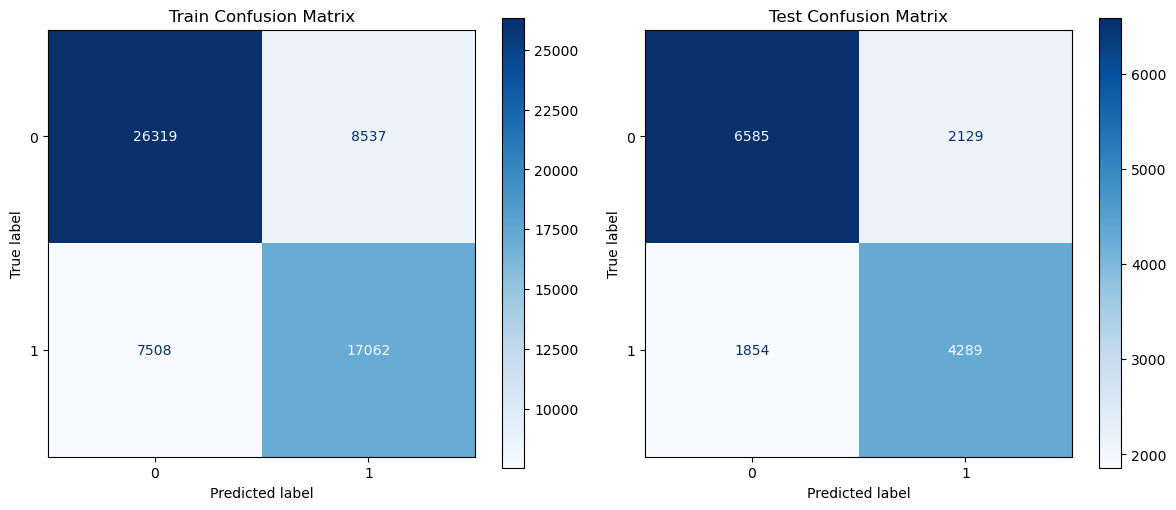


Classification Report (Train):
              precision    recall  f1-score   support

          No     0.7780    0.7551    0.7664     34856
         Yes     0.6665    0.6944    0.6802     24570

    accuracy                         0.7300     59426
   macro avg     0.7223    0.7248    0.7233     59426
weighted avg     0.7319    0.7300    0.7307     59426


Classification Report (Test):
              precision    recall  f1-score   support

          No     0.7803    0.7557    0.7678      8714
         Yes     0.6683    0.6982    0.6829      6143

    accuracy                         0.7319     14857
   macro avg     0.7243    0.7269    0.7254     14857
weighted avg     0.7340    0.7319    0.7327     14857



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Suppress exponential notation in output
np.set_printoptions(suppress=True)

print("\n" + "="*80)
print(" "*26 + "GRADIENT BOOSTING MODEL")
print("="*80)

# Step 1: Define model and hyperparameters
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'subsample': [0.8, 1.0]
}

# Step 2: Grid Search CV on training data
grid_gb = GridSearchCV(gb, gb_params, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(X_train_preprocessed, y_train)
best_gb = grid_gb.best_estimator_

# Step 3: Predictions
y_train_pred = best_gb.predict(X_train_preprocessed)
y_test_pred = best_gb.predict(X_test_preprocessed)

# Step 4: Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nTrain Confusion Matrix:")
print(train_cm)
print("\nTest Confusion Matrix:")
print(test_cm)

# Step 5: Plot side-by-side confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=[0, 1])
disp_train.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title("Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=[0, 1])
disp_test.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.savefig("gradient_boosting_cm_train_test.png", dpi=300)
plt.show()

# Step 6: Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, digits=4))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))



                            RANDOM FOREST MODEL

Train Confusion Matrix:
[[24740 10116]
 [ 5333 19237]]

Test Confusion Matrix:
[[6036 2678]
 [1400 4743]]


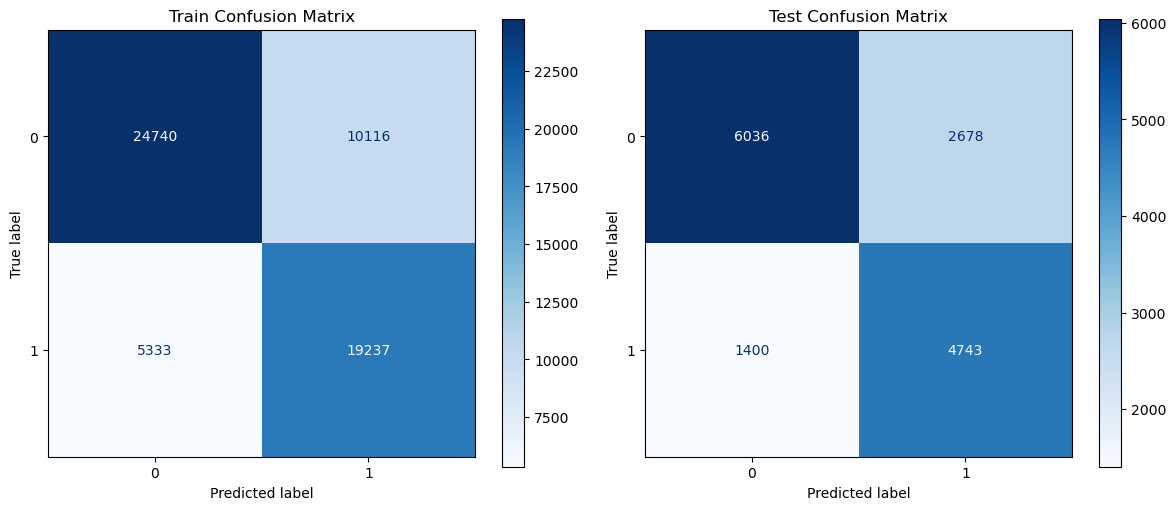


Classification Report (Train):
              precision    recall  f1-score   support

          No     0.8227    0.7098    0.7621     34856
         Yes     0.6554    0.7829    0.7135     24570

    accuracy                         0.7400     59426
   macro avg     0.7390    0.7464    0.7378     59426
weighted avg     0.7535    0.7400    0.7420     59426


Classification Report (Test):
              precision    recall  f1-score   support

          No     0.8117    0.6927    0.7475      8714
         Yes     0.6391    0.7721    0.6994      6143

    accuracy                         0.7255     14857
   macro avg     0.7254    0.7324    0.7234     14857
weighted avg     0.7404    0.7255    0.7276     14857



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Prevent scientific notation in output
np.set_printoptions(suppress=True)

print("\n" + "="*80)
print(" "*28 + "RANDOM FOREST MODEL")
print("="*80)

# Step 1: Define Random Forest and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Step 2: GridSearchCV for best model
grid_rf = GridSearchCV(rf, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_preprocessed, y_train)
best_rf = grid_rf.best_estimator_

# Step 3: Predictions
y_train_pred = best_rf.predict(X_train_preprocessed)
y_test_pred = best_rf.predict(X_test_preprocessed)

# Step 4: Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nTrain Confusion Matrix:")
print(train_cm)
print("\nTest Confusion Matrix:")
print(test_cm)

# Step 5: Side-by-side confusion matrix plots (integer values)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=[0, 1])
disp_train.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title("Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=[0, 1])
disp_test.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.savefig("random_forest_cm_train_test.png", dpi=300)
plt.show()

# Step 6: Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, digits=4))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))



                            VOTING CLASSIFIER MODEL

Train Confusion Matrix:
[[25106  9750]
 [ 6222 18348]]

Test Confusion Matrix:
[[6221 2493]
 [1562 4581]]


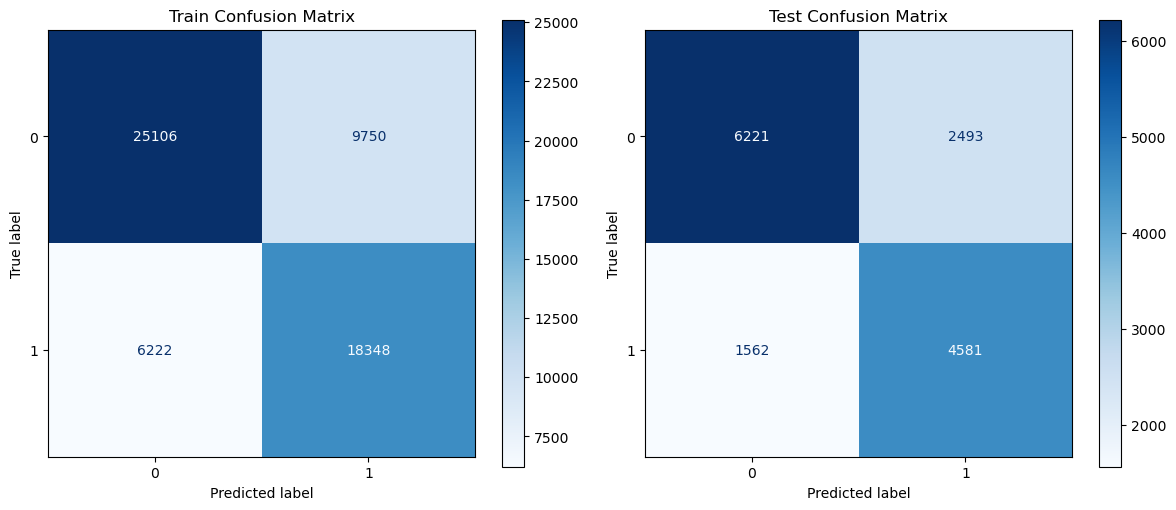


Classification Report (Train):
              precision    recall  f1-score   support

          No     0.8014    0.7203    0.7587     34856
         Yes     0.6530    0.7468    0.6967     24570

    accuracy                         0.7312     59426
   macro avg     0.7272    0.7335    0.7277     59426
weighted avg     0.7400    0.7312    0.7331     59426


Classification Report (Test):
              precision    recall  f1-score   support

          No     0.7993    0.7139    0.7542      8714
         Yes     0.6476    0.7457    0.6932      6143

    accuracy                         0.7271     14857
   macro avg     0.7234    0.7298    0.7237     14857
weighted avg     0.7366    0.7271    0.7290     14857



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Suppress exponential notation in output
np.set_printoptions(suppress=True)

print("\n" + "="*80)
print(" "*28 + "VOTING CLASSIFIER MODEL")
print("="*80)

# Step 1: Combine the best individual models into an ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_log_reg),
        ('gb', best_gb),
        ('rf', best_rf)
    ],
    voting='soft',  # use probabilities for averaging
    n_jobs=-1
)

# Step 2: Fit the voting classifier
voting_clf.fit(X_train_preprocessed, y_train)

# Step 3: Predictions
y_train_pred = voting_clf.predict(X_train_preprocessed)
y_test_pred = voting_clf.predict(X_test_preprocessed)

# Step 4: Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nTrain Confusion Matrix:")
print(train_cm)
print("\nTest Confusion Matrix:")
print(test_cm)

# Step 5: Plot confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=[0, 1])
disp_train.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title("Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=[0, 1])
disp_test.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.savefig("voting_classifier_cm_train_test.png", dpi=300)
plt.show()

# Step 6: Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, digits=4))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))


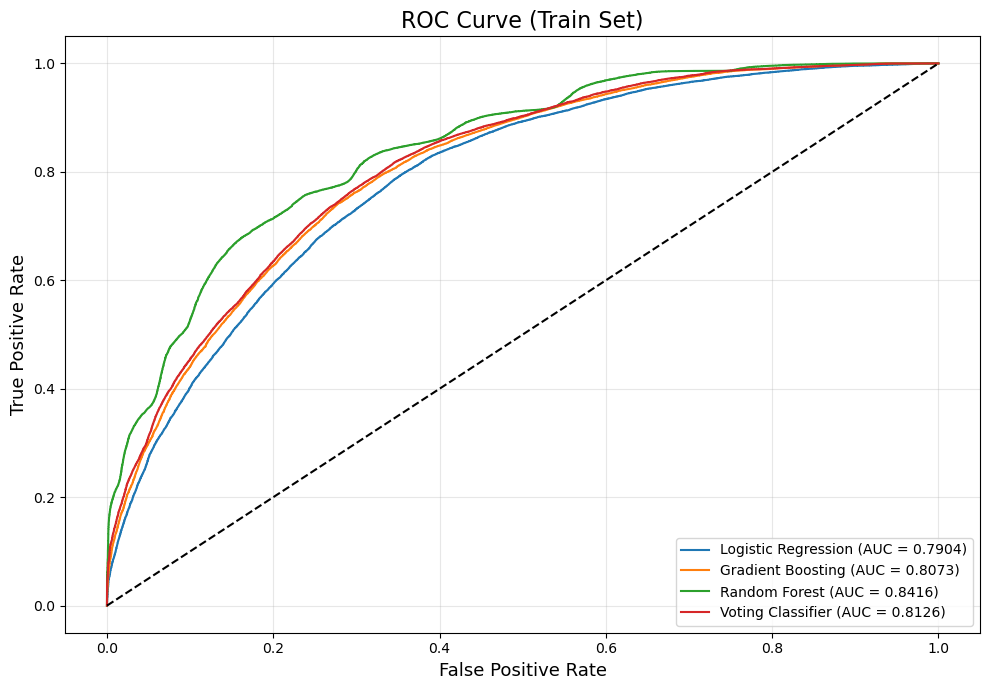

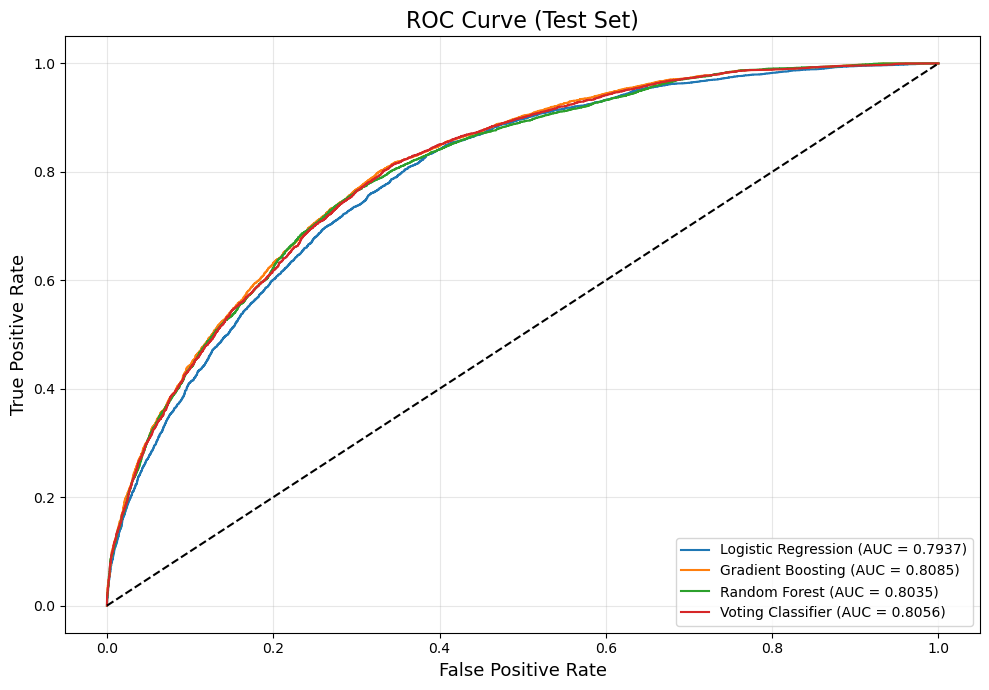

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make sure labels are consistent
pos_label = 'Yes'

# --- Train Probabilities ---
y_proba_lr_train = best_log_reg.predict_proba(X_train_preprocessed)[:, 1]
y_proba_gb_train = best_gb.predict_proba(X_train_preprocessed)[:, 1]
y_proba_rf_train = best_rf.predict_proba(X_train_preprocessed)[:, 1]
y_proba_vote_train = voting_clf.predict_proba(X_train_preprocessed)[:, 1]

# --- Test Probabilities ---
y_proba_lr_test = best_log_reg.predict_proba(X_test_preprocessed)[:, 1]
y_proba_gb_test = best_gb.predict_proba(X_test_preprocessed)[:, 1]
y_proba_rf_test = best_rf.predict_proba(X_test_preprocessed)[:, 1]
y_proba_vote_test = voting_clf.predict_proba(X_test_preprocessed)[:, 1]

# ROC Curves and AUC for Train
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, y_proba_lr_train, pos_label=pos_label)
fpr_gb_train, tpr_gb_train, _ = roc_curve(y_train, y_proba_gb_train, pos_label=pos_label)
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_proba_rf_train, pos_label=pos_label)
fpr_vote_train, tpr_vote_train, _ = roc_curve(y_train, y_proba_vote_train, pos_label=pos_label)

auc_lr_train = auc(fpr_lr_train, tpr_lr_train)
auc_gb_train = auc(fpr_gb_train, tpr_gb_train)
auc_rf_train = auc(fpr_rf_train, tpr_rf_train)
auc_vote_train = auc(fpr_vote_train, tpr_vote_train)

# ROC Curves and AUC for Test
fpr_lr_test, tpr_lr_test, _ = roc_curve(y_test, y_proba_lr_test, pos_label=pos_label)
fpr_gb_test, tpr_gb_test, _ = roc_curve(y_test, y_proba_gb_test, pos_label=pos_label)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_proba_rf_test, pos_label=pos_label)
fpr_vote_test, tpr_vote_test, _ = roc_curve(y_test, y_proba_vote_test, pos_label=pos_label)

auc_lr_test = auc(fpr_lr_test, tpr_lr_test)
auc_gb_test = auc(fpr_gb_test, tpr_gb_test)
auc_rf_test = auc(fpr_rf_test, tpr_rf_test)
auc_vote_test = auc(fpr_vote_test, tpr_vote_test)

# --- Plot ROC for Train Set ---
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr_train, tpr_lr_train, label=f'Logistic Regression (AUC = {auc_lr_train:.4f})')
plt.plot(fpr_gb_train, tpr_gb_train, label=f'Gradient Boosting (AUC = {auc_gb_train:.4f})')
plt.plot(fpr_rf_train, tpr_rf_train, label=f'Random Forest (AUC = {auc_rf_train:.4f})')
plt.plot(fpr_vote_train, tpr_vote_train, label=f'Voting Classifier (AUC = {auc_vote_train:.4f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve (Train Set)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve_train_all_models.png', dpi=300)
plt.show()

# --- Plot ROC for Test Set ---
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr_test, tpr_lr_test, label=f'Logistic Regression (AUC = {auc_lr_test:.4f})')
plt.plot(fpr_gb_test, tpr_gb_test, label=f'Gradient Boosting (AUC = {auc_gb_test:.4f})')
plt.plot(fpr_rf_test, tpr_rf_test, label=f'Random Forest (AUC = {auc_rf_test:.4f})')
plt.plot(fpr_vote_test, tpr_vote_test, label=f'Voting Classifier (AUC = {auc_vote_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve (Test Set)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve_test_all_models.png', dpi=300)
plt.show()


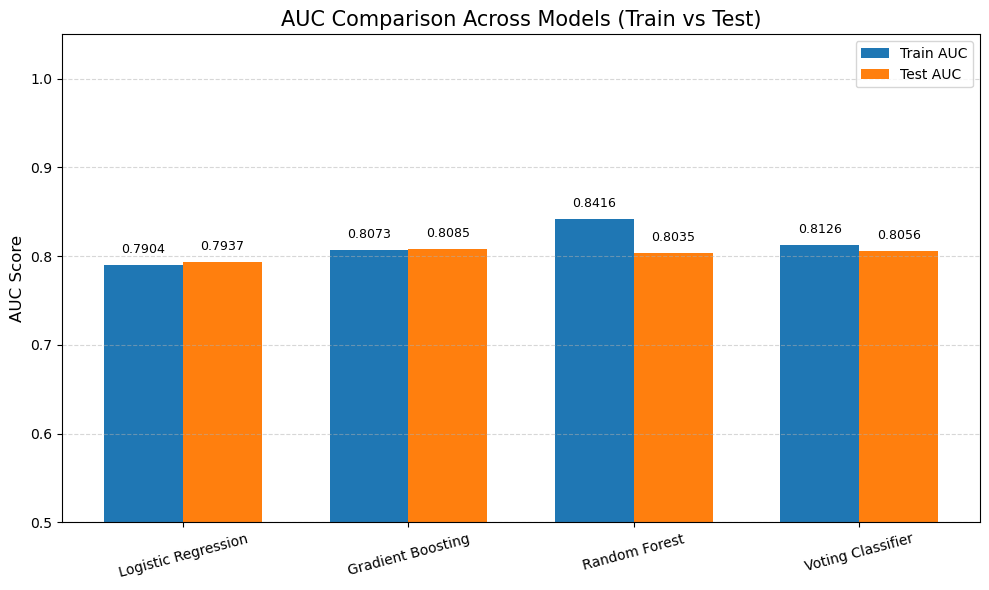

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# AUC scores (you already computed these in the previous step)
auc_scores_train = {
    'Logistic Regression': auc_lr_train,
    'Gradient Boosting': auc_gb_train,
    'Random Forest': auc_rf_train,
    'Voting Classifier': auc_vote_train
}

auc_scores_test = {
    'Logistic Regression': auc_lr_test,
    'Gradient Boosting': auc_gb_test,
    'Random Forest': auc_rf_test,
    'Voting Classifier': auc_vote_test
}

# Bar chart settings
models = list(auc_scores_train.keys())
x = np.arange(len(models))  # label locations
width = 0.35  # bar width

# Create the bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, list(auc_scores_train.values()), width, label='Train AUC')
bars2 = plt.bar(x + width/2, list(auc_scores_test.values()), width, label='Test AUC')

# Add value labels on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

# Chart aesthetics
plt.title('AUC Comparison Across Models (Train vs Test)', fontsize=15)
plt.xticks(x, models, rotation=15)
plt.ylabel('AUC Score', fontsize=12)
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("auc_comparison_bar_chart.png", dpi=300)
plt.show()


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Step 1: Store Train Results
train_results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_train, best_log_reg.predict(X_train_preprocessed)),
        'Precision': precision_score(y_train, best_log_reg.predict(X_train_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_train, best_log_reg.predict(X_train_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_train, best_log_reg.predict(X_train_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_lr_train
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_score(y_train, best_gb.predict(X_train_preprocessed)),
        'Precision': precision_score(y_train, best_gb.predict(X_train_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_train, best_gb.predict(X_train_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_train, best_gb.predict(X_train_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_gb_train
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_train, best_rf.predict(X_train_preprocessed)),
        'Precision': precision_score(y_train, best_rf.predict(X_train_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_train, best_rf.predict(X_train_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_train, best_rf.predict(X_train_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_rf_train
    },
    'Voting Classifier': {
        'Accuracy': accuracy_score(y_train, voting_clf.predict(X_train_preprocessed)),
        'Precision': precision_score(y_train, voting_clf.predict(X_train_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_train, voting_clf.predict(X_train_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_train, voting_clf.predict(X_train_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_vote_train
    }
}

# Step 2: Store Test Results
test_results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, best_log_reg.predict(X_test_preprocessed)),
        'Precision': precision_score(y_test, best_log_reg.predict(X_test_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_test, best_log_reg.predict(X_test_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_test, best_log_reg.predict(X_test_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_lr_test
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_score(y_test, best_gb.predict(X_test_preprocessed)),
        'Precision': precision_score(y_test, best_gb.predict(X_test_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_test, best_gb.predict(X_test_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_test, best_gb.predict(X_test_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_gb_test
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, best_rf.predict(X_test_preprocessed)),
        'Precision': precision_score(y_test, best_rf.predict(X_test_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_test, best_rf.predict(X_test_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_test, best_rf.predict(X_test_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_rf_test
    },
    'Voting Classifier': {
        'Accuracy': accuracy_score(y_test, voting_clf.predict(X_test_preprocessed)),
        'Precision': precision_score(y_test, voting_clf.predict(X_test_preprocessed), pos_label=pos_label),
        'Recall': recall_score(y_test, voting_clf.predict(X_test_preprocessed), pos_label=pos_label),
        'F1 Score': f1_score(y_test, voting_clf.predict(X_test_preprocessed), pos_label=pos_label),
        'ROC-AUC': auc_vote_test
    }
}

# Step 3: Convert to DataFrames
train_results_df = pd.DataFrame(train_results).T.round(4)
test_results_df = pd.DataFrame(test_results).T.round(4)

# Step 4: Display Results
print("\n=== TRAINING RESULTS ===")
display(train_results_df)

print("\n=== TEST RESULTS ===")
display(test_results_df)

# Step 5: Determine best model based on most wins in Accuracy, Precision, ROC-AUC
best_accuracy = test_results_df['Accuracy'].idxmax()
best_precision = test_results_df['Precision'].idxmax()
best_roc_auc = test_results_df['ROC-AUC'].idxmax()

# Count wins
votes = pd.Series([best_accuracy, best_precision, best_roc_auc]).value_counts()
best_model_overall = votes.idxmax()

# Step 6: Show best model clearly
print(f"\n Best Overall Model Based on Accuracy, Precision & ROC-AUC: {best_model_overall}")



=== TRAINING RESULTS ===


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.7142,0.6362,0.7211,0.6760,0.7904
Gradient Boosting,0.7300,0.6665,0.6944,0.6802,0.8073
Random Forest,0.7400,0.6554,0.7829,0.7135,0.8416
Voting Classifier,0.7312,0.6530,0.7468,0.6967,0.8126



=== TEST RESULTS ===


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.7170,0.6392,0.7249,0.6793,0.7937
Gradient Boosting,0.7319,0.6683,0.6982,0.6829,0.8085
Random Forest,0.7255,0.6391,0.7721,0.6994,0.8035
Voting Classifier,0.7271,0.6476,0.7457,0.6932,0.8056



 Best Overall Model Based on Accuracy, Precision & ROC-AUC: Gradient Boosting
